In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\M RAJESH\Desktop\Ekeeda DS\Social_Network_Ads_LR.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

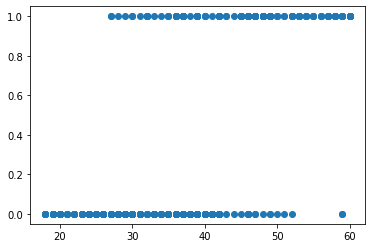

In [4]:
plt.scatter(df['Age'],df['Purchased'])

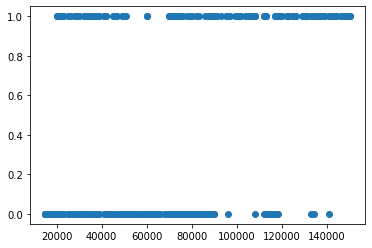

In [5]:
plt.scatter(df['EstimatedSalary'],df['Purchased'])

In [6]:
x=df.drop('Purchased',axis=1)
y=df.Purchased

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [8]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.fit_transform(X_test)

In [9]:
X_train

array([[-0.27257222,  0.81711559],
       [-0.27257222,  1.14463175],
       [ 0.48837095,  1.26372853],
       [-1.12863329, -1.11820715],
       [-1.41398698, -0.64182001],
       [ 2.10537519, -0.82046519],
       [-1.69934067,  0.13230908],
       [-0.17745433, -0.28452966],
       [-0.27257222,  0.07276069],
       [-1.69934067,  0.48959944],
       [-0.17745433, -0.46317484],
       [ 1.6297857 ,  1.65079308],
       [-0.08233643,  0.31095426],
       [-0.08233643, -0.37385225],
       [-1.88957646, -0.52272323],
       [ 0.01278147,  0.0429865 ],
       [-0.27257222, -0.58227162],
       [-0.55792591,  1.41259951],
       [ 2.01025729,  2.18672861],
       [ 0.77372464, -1.23730393],
       [ 0.77372464, -1.38617491],
       [-0.9383975 , -0.7609168 ],
       [ 1.24931412, -1.38617491],
       [ 0.10789936,  1.08508336],
       [-0.27257222, -0.58227162],
       [-1.12863329,  0.48959944],
       [-1.03351539,  0.43005104],
       [-1.12863329,  0.31095426],
       [ 1.53466781,

In [10]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 0)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [11]:
y_pred=log_reg.predict(X_test)

In [12]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
y_pred.shape

(80,)

In [14]:
y_test

218    0
191    0
117    0
50     0
348    0
      ..
184    0
140    0
107    0
241    0
48     1
Name: Purchased, Length: 80, dtype: int64

In [15]:
print(log_reg.predict(std_scaler.transform([[12,87000]])))

[0]


In [16]:
#np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test.values),1)),1))

[[1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]]


In [17]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[47  6]
 [ 4 23]]


0.875

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [19]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
y_pred_knn = knn.predict(X_test)

In [21]:
print(confusion_matrix(y_test, y_pred_knn))

[[48  5]
 [ 4 23]]


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.82      0.85      0.84        27

    accuracy                           0.89        80
   macro avg       0.87      0.88      0.88        80
weighted avg       0.89      0.89      0.89        80



In [23]:
accuracy_score(y_test,y_pred_knn)

0.8875

choosing k value

In [24]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [25]:
error_rate

[0.1125,
 0.15,
 0.0875,
 0.0875,
 0.0875,
 0.0875,
 0.075,
 0.075,
 0.0625,
 0.075,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.05,
 0.0625,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.0625,
 0.0625]

Text(0, 0.5, 'Error Rate')

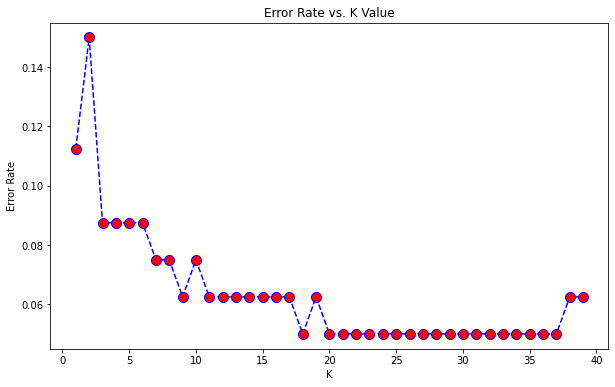

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [27]:
knn_16 = KNeighborsClassifier(n_neighbors=16)
knn_16.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=16)

In [28]:
y_pred_16 = knn_16.predict(X_test)

In [29]:
print(confusion_matrix(y_test,y_pred_16))
print('\n')
print(accuracy_score(y_test,y_pred_16))
print('\n')
print(classification_report(y_test,y_pred_16))


[[49  4]
 [ 1 26]]


0.9375


              precision    recall  f1-score   support

           0       0.98      0.92      0.95        53
           1       0.87      0.96      0.91        27

    accuracy                           0.94        80
   macro avg       0.92      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80

